# Supporting Vector Regression
## Import the necessry Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Import Data

In [2]:
data = pd.read_csv("Position_Salaries.csv")
X = data.iloc[:,1:2].values
y = data.iloc[:,-1].values

## Feature Scaling

In [3]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [4]:
sc_y = StandardScaler()
y = y.reshape(-1,1)
y = sc_y.fit_transform(y)

## Traing the SVR model

In [5]:
reg = SVR(kernel ='rbf')
reg.fit(X, y.ravel())

SVR()

## Visulize the Prediction

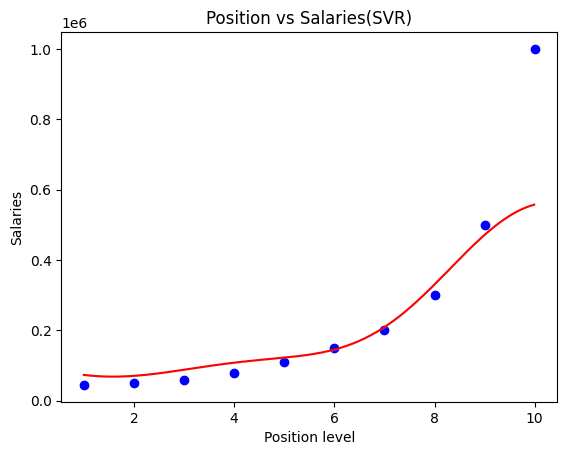

In [9]:

##generate X data for visual
X_grid = np.arange(X.min(), X.max(),0.01)
X_grid = X_grid.reshape(-1,1)

##predict the y data according to X_grid
y_grid_pred = reg.predict(X_grid)
##reverse the StanStandardScaler
X_grid_original = sc_X.inverse_transform(X_grid)
X_original = sc_X.inverse_transform(X)
y_original = sc_y.inverse_transform(y)
y_grid_pred_original = sc_y.inverse_transform(y_grid_pred.reshape(-1,1))

##plot the graph
plt.scatter(X_original, y_original, color='blue', label='Real Data')
plt.plot(X_grid_original, y_grid_pred_original,color ='red',label='SVR prediction')
plt.title('Position vs Salaries(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
##add epsilon tube
epsilon = reg.epsilon
plt.fill_between(X_grid_original.ravel(),
                (y_grid_pred_original.ravel() - epsilon),
                (y_grid_pred_original.ravel() + epsilon),
                color='lightblue',
                alpha=0.3,
                label='epsilon-tube')
plt.show()